# 資料匯入與預處理

In [1]:
import numpy as np
from keras.datasets import mnist

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

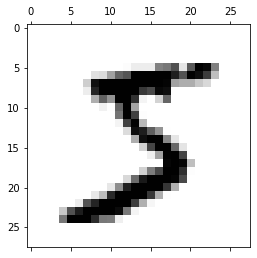

In [3]:
import matplotlib.pyplot as plt
train_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('binary'))
plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# Input shape format: (28, 28, 1)
# If 128x128 RGB, (128,128,3)
X_train = X_train.reshape(X_train.shape[0],28,28,1) / 255
X_test = X_test.reshape(X_test.shape[0],28,28,1) / 255

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
# one-hot encoding
y_train_onehot = np_utils.to_categorical(y_train, num_classes=10)
y_test_onehot = np_utils.to_categorical(y_test, num_classes=10)

In [8]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [9]:
y_test_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Convolution layer

## Conv2D
#### filters: 濾鏡數量
#### kernel_size: 濾鏡大小
#### strides: 步幅(width, height)或單一數值
#### padding: 'same'-與input shape相同, 'valid'-不使用padding
#### input_shape: 當Conv2D是Sequential第一層時要加上的參數

In [8]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))

#### 先不做整個model的compile跟fit,直接使用這一層所做的轉換
#### 用predict_classes()去看第一筆的X_train
#### 這裡的prediction是一個經過Convolution layer轉換過的一個新的matrix

In [9]:
prediction = model.predict_classes(X_train[:1,:])

1/1 [==============================] - 0s


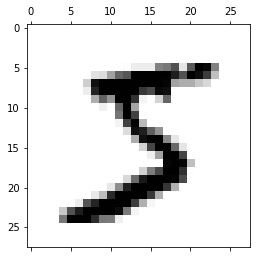

In [10]:
import matplotlib.pyplot as plt
train_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('binary'))
plt.show()

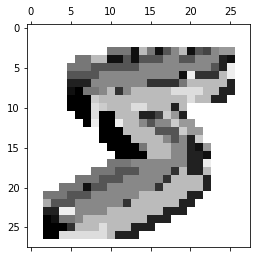

In [11]:
import matplotlib.pyplot as plt
cov_img = np.reshape(prediction[:1, :], (28, 28))
plt.matshow(cov_img, cmap = plt.get_cmap('binary'))
plt.show()

## Max-pooling layer
#### pool_size: pool大小

In [12]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#### 這裡的prediction是一個經過Convolution layer加Max-pooling layer轉換過的一個新的matrix

In [13]:
prediction = model.predict_classes(X_train[:1,:])
prediction[:1,:]

1/1 [==============================] - 0s


array([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  3,  8,  8,  8,  8,  8,  8,  8,  0],
        [ 0,  0,  3,  8,  8,  8,  8,  8,  8,  8,  8,  2,  2,  0],
        [ 0,  0,  8, 15,  8,  4,  4,  4,  4,  4,  4,  4,  6,  0],
        [ 0,  0,  7,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  0],
        [ 0,  0,  7, 12,  4,  4,  4,  2,  3,  3,  0,  0,  0,  0],
        [ 0,  0,  0,  7,  7,  4,  8,  2,  2,  7,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  7, 12,  8,  4,  4,  2,  7,  1,  0,  0],
        [ 0,  0,  0,  0,  0,  3,  4,  4,  8,  5,  5,  2,  0,  0],
        [ 0,  0,  0,  3,  8,  8,  8,  2,  4,  4,  6,  1,  0,  0],
        [ 0,  3,  8,  8,  8,  8,  4,  4,  4,  4,  3, 13,  0,  0],
        [ 0,  8,  8,  8,  4,  4,  4,  4,  3,  3, 13,  0,  0,  0],
        [ 0,  4,  4,  4,  4,  4,  3,  3, 13,  0,  0,  0,  0,  0],
        [ 0, 12,  2,  2,  3,  3, 13,  0,  0,  0,  0,  0,  0,  0]]])

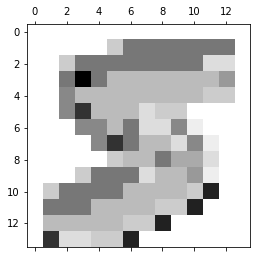

In [14]:
import matplotlib.pyplot as plt
max_pooling_img = np.reshape(prediction[:1, :], (14, 14))
plt.matshow(max_pooling_img, cmap = plt.get_cmap('binary'))
plt.show()

# CNN
#### 我在這裡設了兩層Convolution加Max-pooling的 layer

In [10]:
model = Sequential()
# Conv + Max-pooling 1
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv + Max-pooling 2
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten層: 壓成一維
# Dense 接在內層不用input_dim，其他參數先用預設值
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
history=model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=5, batch_size=300, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 44s 922us/step - loss: 0.5200 - accuracy: 0.8338 - val_loss: 0.1058 - val_accuracy: 0.9698
Epoch 2/5
48000/48000 [==============================] - 45s 935us/step - loss: 0.1467 - accuracy: 0.9566 - val_loss: 0.0673 - val_accuracy: 0.9786
Epoch 3/5
48000/48000 [==============================] - 46s 954us/step - loss: 0.1011 - accuracy: 0.9682 - val_loss: 0.0571 - val_accuracy: 0.9831
Epoch 4/5
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0815 - accuracy: 0.9748 - val_loss: 0.0473 - val_accuracy: 0.9859
Epoch 5/5
48000/48000 [==============================] - 46s 949us/step - loss: 0.0704 - accuracy: 0.9786 - val_loss: 0.0420 - val_accuracy: 0.9872


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

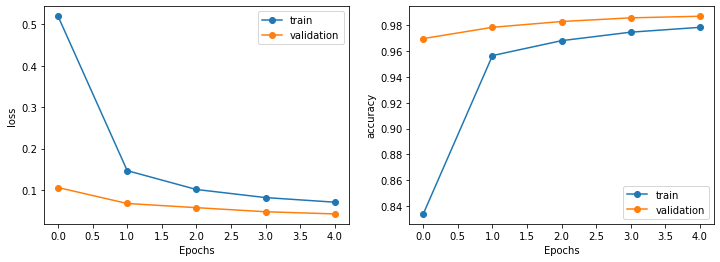

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'accuracy','val_accuracy')

In [16]:
model.evaluate(X_train, y_train_onehot)

60000/60000 [==============================] - 17s 290us/step


[0.0332129222027453, 0.989983320236206]

### 預測
把資料一一顯示出來看

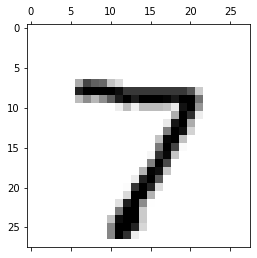

In [17]:
import matplotlib.pyplot as plt
test_img = np.reshape(X_test[:1, :], (28, 28))
plt.matshow(test_img, cmap = plt.get_cmap('binary'))
plt.show()

In [18]:
model.predict_classes(X_test[:1,:])

array([7], dtype=int64)

## softmax & prediction

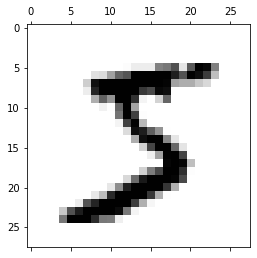

In [19]:
import matplotlib.pyplot as plt
test_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(test_img, cmap = plt.get_cmap('binary'))
plt.show()

In [27]:
model.predict(X_train[:1,:])

array([[1.6040969e-09, 2.8898702e-07, 3.1193477e-07, 3.9858945e-02,
        1.4156105e-09, 9.6011883e-01, 4.6636718e-08, 4.8119882e-06,
        6.1921178e-06, 1.0624044e-05]], dtype=float32)

In [28]:
model.predict(X_train[:1,:]).reshape(-1)

array([1.6040969e-09, 2.8898702e-07, 3.1193477e-07, 3.9858945e-02,
       1.4156105e-09, 9.6011883e-01, 4.6636718e-08, 4.8119882e-06,
       6.1921178e-06, 1.0624044e-05], dtype=float32)

<BarContainer object of 10 artists>

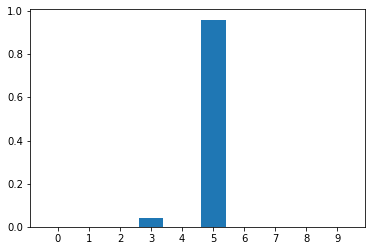

In [21]:
y = model.predict(X_train[:1,:]).reshape(-1)
x = [i for i in range(len(y))]
plt.xticks(x) # show all xticks
plt.bar(x,y)

In [22]:
model.predict_classes(X_train[:1,:])

array([5], dtype=int64)

# 混淆矩陣 (Confusion Matrix)

In [23]:
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

